# Please install the following python libraries
- python3: https://www.python.org/
- numpy: https://numpy.org/install/
- tqdm: https://github.com/tqdm/tqdm#installation
- matplotlib: https://matplotlib.org/stable/users/installing/index.html
- ipywidgets and ipykernel if necessary
- Starter Code was tested on Python 3.11.5

In [15]:
import random
import numpy as np
import tqdm.notebook as tqdm
import matplotlib.pyplot as plt
import ipywidgets as widgets
from tqdm import tqdm


# 1: Complete the Implementation of the Four Rooms environment 

- The FourRooms is implemented as a python class. We explain the attributes and methods as follows
    - **init** function: Define all the attributes of the Four Rooms environment. For example, the state space, the action space, the start state, the goal state and so on.
    - **reset** function: Resets the agent to the start state (0, 0)
    - **step** function: Takes the current state and one action, returns the next state and a reward
   
- Please complete the implementation in the step function.

In [16]:
# FOUR ROOM ENVIRONMENT
class FourRooms(object):
    def __init__(self):
        # define the four room as a 2-D array for easy state space reference and visualization
        # 0 represents an empty cell; 1 represents a wall cell
        self.four_room_space = np.array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])
        
        # find the positions for all empty cells
        # not that: the origin for a 2-D numpy array is located at top-left while the origin for the FourRooms is at
        # the bottom-left. The following codes performs the re-projection.
        empty_cells = np.where(self.four_room_space == 0.0)
        self.state_space = [[col, 10 - row] for row, col in zip(empty_cells[0], empty_cells[1])]

        # define the action space
        self.action_space = {'LEFT': np.array([-1, 0]),
                             'RIGHT': np.array([1, 0]),
                             'DOWN': np.array([0, -1]),
                             'UP': np.array([0, 1])}
        
        # define the start state
        self.start_state = [0, 0]
        
        # define the goal state
        self.goal_state = [10, 10]
        

    def reset(self):
        """
        Reset the agent's state to the start state [0, 0]
        Return both the start state and reward
        """
        state = self.start_state  # reset the agent to [0, 0]
        reward = 0  # reward is 0
        return state, reward
        

    def step(self, state, act):
        """
        Args: 
            state: a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act: a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args: 
            next_state: a list variable containing x, y integer coordinates (i.e., [1, 1])
            reward: an integer. it can be either 0 or 1.
        """
        # CODE HERE: implement the stochastic dynamics as described in Q1. 
        # Please note, we provide you with the deterministic transition function "take_action" below.
        # Therefore, you only have to implement the logics of the stochasticity.
        
        # Dictionary to assign perpendicualr directions to each action
        perpendicular = {"UP": ["LEFT", "RIGHT"],
                         "DOWN": ["LEFT", "RIGHT"],
                         "LEFT": ["UP", "DOWN"],
                         "RIGHT": ["UP", "DOWN"]}
        
        
        noise = random.random()  # generate a random number between 0 and 1
        
        if noise < 0.8:
            # with 0.8 probability, the agent will move according to the action
            next_state = self.take_action(state, act)
            
        elif noise < 0.9:
            # with 0.1 probability, the agent will move in a perpendicular direction
            next_state = self.take_action(state, perpendicular[act][0])
        
        else:
            # with 0.1 probability, the agent will move in the other perpendicular direction
            next_state = self.take_action(state, perpendicular[act][1])
        

        # CODE HERE: compute the reward based on the resulting state
        reward = int(next_state == self.goal_state)  # if the agent reaches the goal state, the reward is 1; otherwise, 0
        

        # return the current state, reward
        return next_state, reward
        

    """ DO NOT CHANGE BELOW """
    def take_action(self, state, act):
        """
        Input args: 
            state (list): a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act (string): a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args: 
            next_state (list): a list variable containing x, y integer coordinates (i.e., [1, 1])
        """
        state = np.array(state)
        next_state = state + self.action_space[act]
        return next_state.tolist() if next_state.tolist() in self.state_space else state.tolist()

In [17]:
"""Here is the plot function you can use to generate the figure. DO NOT CHANGE"""
# PLOT FUNCTION
def plot_func(res_list):
    # set the figure size
    plt.figure(figsize=(8, 6))
    
    # plot each trial
    for re in res_list:
        plt.plot(list(range(len(res_list[0]))), re, linestyle="--", linewidth=1, alpha=0.7)

    # plot mean reward
    mean_reward = np.array(res_list).mean(axis=0).tolist()
    plt.plot(list(range(len(res_list[0]))), mean_reward, linestyle="-", linewidth=2, color="k")

    # plot the figure
    plt.ylabel("Cumulative reward")
    plt.xlabel("Time step")
    plt.show()

# 2 Implement the manual policy

Use this to check your whether your implementation of the step function is correct.

In [18]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)

    # create the environment
    env = FourRooms()
    state, reward = env.reset()  # always call reset() before interaction
    
    # manual time step (YOU CAN CHANGE THIS TO ANY TIME STEP YOU WANT)
    time_step = 100

    # create a loop
    for t in range(time_step):
        
        # CODE HERE: implement your manual agent/policy function that takes in the action from the standard input
        action = input("Enter the action (UP, DOWN, LEFT, RIGHT): ")
        
        # CODE HERE: implement the code to interact with the Four Rooms environment above.
        # it should takes in the current state and action and returns the next_state and a reward
        # Hint: use the step function that you implement.
        next_state, reward = env.step(state, action)
        
        """DO NOT CHANGE BELOW"""
        # print interaction
        print(f"Step = {t}, state = {state}, action = {action}, next state = {next_state}, reward = {reward}")
        
        # reset if the agent reaches the goal
        if reward == 1:
            print("Reset the agent to the start state!")
            state, reward = env.reset()
        else:
            state = next_state

KeyError: ''

# 3 Implement a random policy

We provide the scaffolding code for running and plotting. Please implement a random policy

**Please note: you should read the code carefully before implementing to make sure the variable names are aligned.**

Run trial: 100%|██████████| 10/10 [00:00<00:00, 13.52it/s]


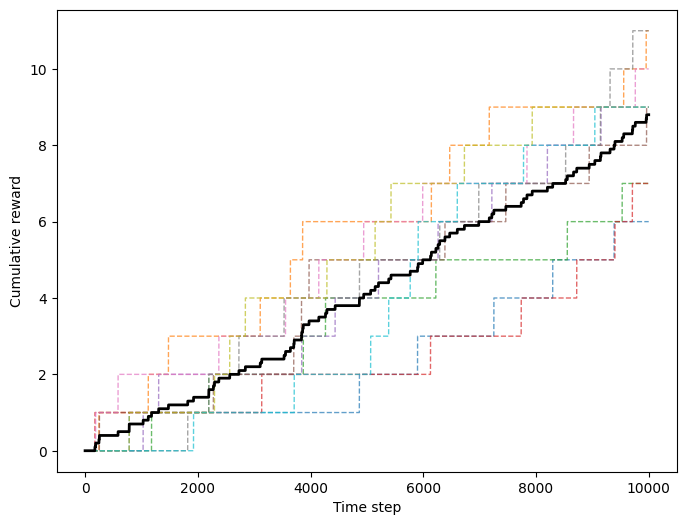

In [19]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create the environment
    env = FourRooms()

    # number of the trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_num = 10   
    # length of each trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_length = int(1e4)
    
    # save the rewards for plot
    rewards_list = []
    
    # run experiment
    for e in tqdm(range(trial_num), desc="Run trial",position=0):
        
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
    
        # reset the environment 
        state, reward = env.reset()
        
        # run each trial
        for t in tqdm(range(trial_length), desc="Episode", position=1, leave=False):
            
            
            # CODE HERE: please implement a random policy to obtain an action.
            # it should return a random action from ["UP", "DOWN", "LEFT", "RIGHT"]
            noise = random.random()
            if noise < 0.25:
                action = "UP"
            elif noise < 0.5:
                action = "DOWN"
            elif noise < 0.75:
                action = "LEFT"
            else:
                action = "RIGHT"
                       
            # CODE HERE: please implement the code to get the next state and reward
            # it should takes in the current state and action
            # it should returns the next_state and reward
            next_state, reward = env.step(state, action)
            
            
            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        rewards_list.append(reward_per_trial)
        
# PLOT THE RESULTS
plot_func(rewards_list)

# Q3 Written:
This strategy is not as strong as my manual policy. The main reason for this difference is there is strategy behind my manual policy, I try and move through the gates and get to the reward square as fast and efficiently as possible, I also have the advantage of knowing the reward state and location of the walls to formulate my strategy. Meanwhile the random policy has no strategy and simply brute forces its way to the end.


# 4 Implement better & worse policies against the Random Policy

Run trial: 100%|██████████| 10/10 [00:00<00:00, 13.08it/s]


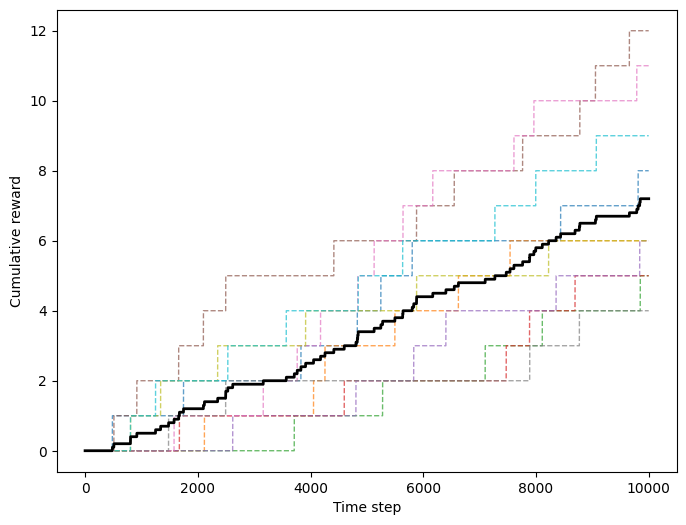

In [20]:
# Worse Policy: Random policy but no action is taken twice in a row

if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create the environment
    env = FourRooms()

    # number of the trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_num = 10   
    # length of each trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_length = int(1e4)
    
    # save the rewards for plot
    rewards_list = []
    
    # run experiment
    for e in tqdm(range(trial_num), desc="Run trial",position=0):
        
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
    
        # reset the environment 
        state, reward = env.reset()
        
        # run each trial
        for t in tqdm(range(trial_length), desc="Episode", position=1, leave=False):
            
            
            # CODE HERE: Worse Policy
            # it should return a random action from ["UP", "DOWN", "LEFT", "RIGHT"]
            actions = ["UP", "DOWN", "LEFT", "RIGHT"]
            if action == None:
                action = random.choice(actions)
            else:
                actions.remove(action)
                action = random.choice(actions)
                       
            # CODE HERE: please implement the code to get the next state and reward
            # it should takes in the current state and action
            # it should returns the next_state and reward
            next_state, reward = env.step(state, action)
            
            
            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        rewards_list.append(reward_per_trial)
        
# PLOT THE RESULTS
plot_func(rewards_list)

Run trial: 100%|██████████| 10/10 [00:01<00:00,  8.64it/s]


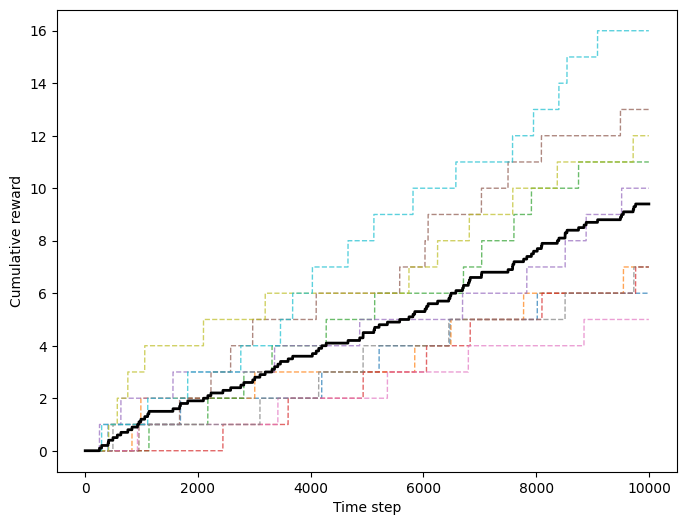

In [8]:
# Equally Bad Policy: E-Greedy Policy without Gamma (Basically turns into Random Policy)

if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create the environment
    env = FourRooms()

    # number of the trail
    trial_num = 10   
    # length of each trail
    trial_length = int(1e4)
    
    # save the rewards for plot
    rewards_list = []
    
    # Using E-Greedy Policy
    
    # Set epsilon to 0.1
    epsilon = 0.3
    
    # QValue is the expected value of choosing an action in a given state
    QValue = {}
    
    # Need to track amount of times each action is taken in a given state
    actionCounts = {} # Initialize N values for all actions to 0
    
    # run experiment
    for e in tqdm(range(trial_num), desc="Run trial",position=0):
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
    
        # reset the environment 
        state, reward = env.reset()
        
        # run each trial
        for t in tqdm(range(trial_length), desc="Episode", position=1, leave=False):
            # CODE HERE: please implement a policy that is better than the random policy.
            # It should takes in the current state and output an action
            # Choose a from state using policy derived from Q (e.g., epsilon-greedy)
            
            # Covert state to tuple to use as key in QValue
            stateTuple = tuple(state)
            
            # If no Q value for state, initialize to 0
            if stateTuple not in QValue:
                QValue[stateTuple] = {"UP": 0, "DOWN": 0, "LEFT": 0, "RIGHT": 0} # Initialize Q values for all actions to 0
            
            # If no action count for state, initialize to 0
            if stateTuple not in actionCounts:
                actionCounts[stateTuple] = {"UP": 0, "DOWN": 0, "LEFT": 0, "RIGHT": 0} # Initialize N values for all actions to 0
                
            # Choose a from state using policy derived from Q or a random action with probability epsilon
            if (random.random() < epsilon): # Choose a random action with probability epsilon
                action = random.choice(["UP", "DOWN", "LEFT", "RIGHT"])
            else:
                action = max(QValue[stateTuple], key=lambda x: QValue[stateTuple][x]) # Choose the action in this state with the highest Q value
                if QValue[stateTuple][action] == 0: # If max Q value is 0, choose a random action
                    action = random.choice(["UP", "DOWN", "LEFT", "RIGHT"])
            
            # CODE HERE: please implement the code to get the next state and reward
            next_state, reward = env.step(state, action)
           
            # Update N(a) = N(a) + 1
            actionCounts[stateTuple][action] += 1
            
            # Update Q(a) = Q(a) + 1/N(a)[r - Q(a)*]
            QValue[stateTuple][action] += 1/actionCounts[stateTuple][action] * (reward - QValue[stateTuple][action])
            
            
            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        rewards_list.append(reward_per_trial)
        
# PLOT THE RESULTS
plot_func(rewards_list)

Run trial: 100%|██████████| 10/10 [00:01<00:00,  8.96it/s]


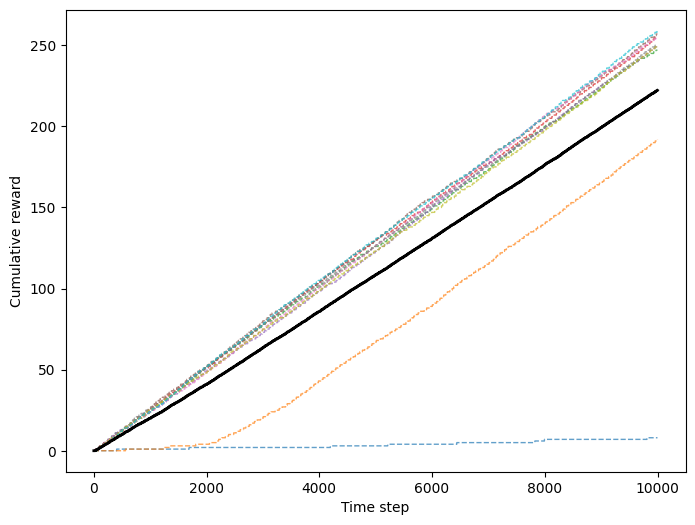

In [31]:
# Better Policy: E-Greedy Policy with Gamma

if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create the environment
    env = FourRooms()

    # number of the trail
    trial_num = 10   
    # length of each trail
    trial_length = int(1e4)
    
    # save the rewards for plot
    rewards_list = []
    
    # Using E-Greedy Policy with Gamma
    
    # Set epsilon to 0.3
    epsilon = 0.3
    # Set gamma to 0.99
    gamma = 0.99
    
    # QValue is the expected value of choosing an action in a given state
    QValue = {}
    
    # Need to track amount of times each action is taken in a given state
    actionCounts = {} # Initialize N values for all actions to 0
    
    # run experiment
    for e in tqdm(range(trial_num), desc="Run trial",position=0):
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
    
        # reset the environment 
        state, reward = env.reset()
        # run each trial
        for t in tqdm(range(trial_length), desc="Episode", position=1, leave=False):
            # CODE HERE: please implement a policy that is better than the random policy.
            # It should takes in the current state and output an action
            
            # Choose a from state using policy derived from Q (e.g., epsilon-greedy)
            
            # Covert state to tuple to use as hashable key in QValue
            stateTuple = tuple(state)
            
            # If no Q value for state, initialize to 0
            if stateTuple not in QValue:
                QValue[stateTuple] = {"UP": 0, "DOWN": 0, "LEFT": 0, "RIGHT": 0} # Initialize Q values for all actions to 0
            
            # If no action count for state, initialize to 0
            if stateTuple not in actionCounts:
                actionCounts[stateTuple] = {"UP": 0, "DOWN": 0, "LEFT": 0, "RIGHT": 0} # Initialize N values for all actions to 0
                
            # Choose a from state using policy derived from Q or a random action with probability epsilon
            if (random.random() < epsilon): # Choose a random action with probability epsilon
                action = random.choice(["UP", "DOWN", "LEFT", "RIGHT"])
            else:
                action = max(QValue[stateTuple], key=lambda x: QValue[stateTuple][x]) # Choose the action in this state with the highest Q value
                if QValue[stateTuple][action] == 0: # If max Q value is 0, choose a random action
                    action = random.choice(["UP", "DOWN", "LEFT", "RIGHT"])
            
            # CODE HERE: please implement the code to get the next state and reward
            next_state, reward = env.step(state, action)
            
            # Convert next state to tuple to use as hashable key in QValue
            next_stateTuple = tuple(next_state)
           
            # Calculate the estimated maximum future reward achievable from the next state
            future_rewards = max(QValue[next_stateTuple].values()) if next_stateTuple in QValue else 0
            
            # Update N(a) = N(a) + 1
            actionCounts[stateTuple][action] += 1
            
            # Update Q(a) = Q(a) + 1/N(a)[r - Q(a)*]
            QValue[stateTuple][action] += 1/actionCounts[stateTuple][action] * ((reward + gamma * future_rewards) - QValue[stateTuple][action])
            
            
            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        rewards_list.append(reward_per_trial)
        
# PLOT THE RESULTS
plot_func(rewards_list)

# Question 4 Written:
The worse strategy is random selection but the same action cannot be taken twice in a row. The modified random policy is worse than a purely random policy in this scenario because it imposes an unnecessary constraint that limits exploration. In this enviorment, it is often optimal to repeat actions, such as moving multiple steps in the same direction to reach the goal. By preventing consecutive actions, the agent is forced to take suboptimal detours, increasing the time needed to reach the goal. This limitation lowers the chance of randomly taking an optimal path and thus reduces the policy's cumulative reward compared to a purely random approach.

The equally bad strategy is a E-Greedy action selection algorithm. It works by with probability E(epsilon) it chooses a random action (exploration), and with probability 1 - E it selects the "best" action. It calculates the best option by calculating an incremental estimate of the Q-Value for each action at each state by summing the rewards from each action at the state and dividing that by the number of times the action was taken in that state. When the maximum QValue is 0(ie. All actions have a QValue of 0 at the given state) a random action is choosen. This algorithm works about as well as the random one as it is not considering future rewards, so only states directly next to the goal state will have any actions with Q-Values above 0. This means it selects randomly in all states except for the ones directly next to the goal, where it will try to move to the goal with probability 1 - E. Making their performances almost identical. I choose an E value of 0.1 for this to limit exploration, as it will already be taking many random actions due to the issue with almost all the QValues being 0, so for the situations where it has calculated QValues > 0 it uses its calculation instead of the random option 90% of the time.

The better strategy is a E-greedy algorithm with gamma. This performs better than a purely random policy due to its strategic balance between exploration and exploitation coupled with its focus on long-term rewards. This algorithm explores different actions with a probability E, ensuring the agent tries new actions, while also exploiting the best-known actions(with probability 1 - E) based on past experience to optimize performance. The gamma parameter is crucial to this, as it allows the agent to consider not only immediate rewards(like in the previous algorithm) but also future rewards, encouraging actions that may lead to greater cumulative success over time. This approach leads to more efficient learning and decision-making, in this environment where planning and foresight are necessary for optimal performance. Unlike the random policy, which brute forces its way to the goal, the E-greedy algorithm with gamma is able leverage future rewards to make informed decisions on what actions to take. I chose a E value of 0.3 and a Gamma of 0.99 for this. I choose an E value of 0.3 because I wanted to encourage enough exploration to discover more possible paths that could be optimal. I chose a Gamma of 0.99 because I wanted the QValues to be heavily weighted towards future rewards as there is only one state with a reward so finding the best path to that state is crucial to finding the most optimal paths.